# Lecture 15: Dimension_Reduction1 Part 2

### 1. Principal Component Analysis (PCA)

Load image with OpenCV. 

If OPenCV not install, try 
*pip install opencv-python* in terminal.

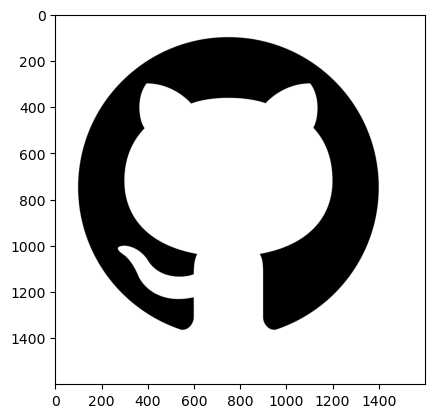

In [12]:
import cv2
import matplotlib.pyplot as plt

A = cv2.imread('png_github_64039.png')

plt.imshow(A)

Check the size of the image.

In [15]:
print(A.shape)

(1600, 1600, 3)


We can have up to 1600 components in this image.

There is 3 color channels in the loaded image, Red Blue Green, although it looks like just balck and white. 

Take a mean on the color channel direction to make it a grayscale image.

In [19]:
from numpy import mean
A1 = mean(A,2)

Check the quality of reconstruction number differnt numbers of principal components.

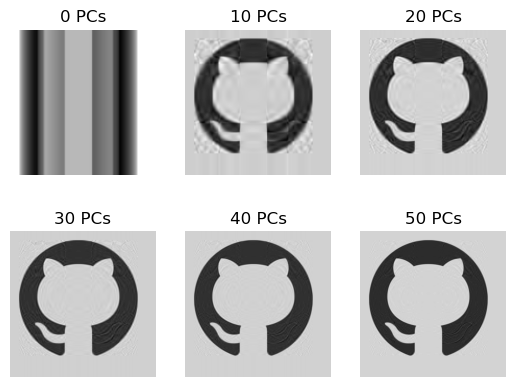

In [49]:
from sklearn import decomposition
import matplotlib.ticker as tic

components = range(0,60,10)
#components = range(1,7,1)
fig=plt.figure()
for i, num_pc in enumerate(components):
    i+=1
    
    # Set the number of qulity being used
    pca = decomposition.PCA(n_components=num_pc)
    pca.fit(A1)
    
    # The reconstruction is done with the inverse_transform method.
    Rec = pca.inverse_transform(pca.transform(A1))
    
    # Make subplot
    ax = fig.add_subplot(2,3,i,frame_on=False)
    
    # Removing ticks
    ax.xaxis.set_major_locator(tic.NullLocator())
    ax.yaxis.set_major_locator(tic.NullLocator())
    
    plt.imshow(Rec)
    plt.title(str(num_pc) + ' PCs')
    plt.gray()


Variance ratio vs the number of principal components

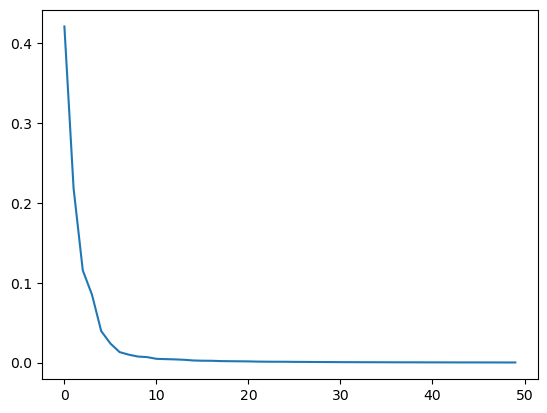

In [54]:
pca1 = decomposition.PCA(n_components=50)
pca1.fit(A1)
var_ratio = pca1.explained_variance_ratio_

plt.plot(range(0,50),var_ratio)
plt.show()

#compares the original and recoverd images

### 2. Singular Value Decomposition (SVD)

The letter J has four components.

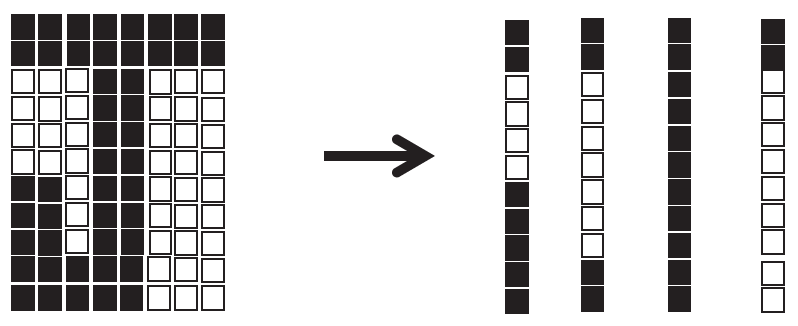

Let's create a noisy J for testing.

Started with a clear J.

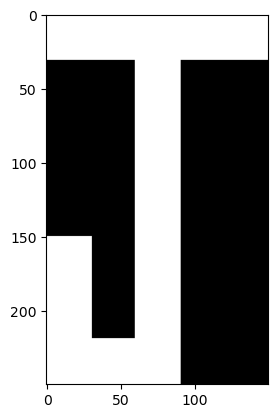

In [58]:
import numpy as np

M = np.zeros((250,150))
M[:31,:]=1
M[:,60:91]=1
M[-31:,:60]=1
M[150:,:31]=1

plt.imshow(M)

Add some noise.

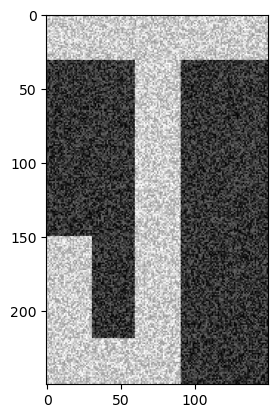

In [61]:
M_noisy = np.asmatrix(np.random.uniform(low=0,\
high=0.7, size=(250,150)))
M_noisy = M + M_noisy

plt.imshow(M_noisy)

Compute the full SVD
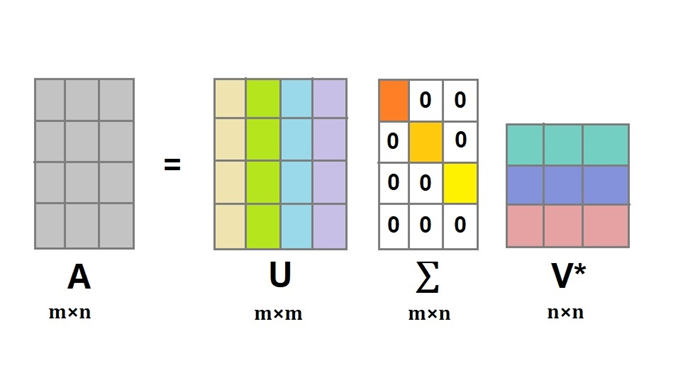

In [64]:
U, s, V = np.linalg.svd(M_noisy)

Use Truncated SVD to cover J.

Let's check the results under different ranks.

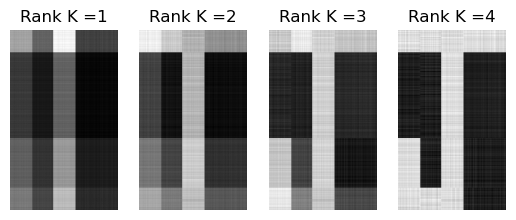

In [69]:
fig=plt.figure()
for K in range(1,5):
    Sig = np.mat(np.eye(K)*s[:K])
    
    U_reduced = U[:,:K] #keeps top k rows of U
    V_reduced = V[:K,:] #keeps top k columns of V
    
    # We get rid of the columns we do not need.
    M_rec = U_reduced*Sig*V_reduced
    
    # Make subplot
    ax = fig.add_subplot(1,4,K,frame_on=False)
    
    # Removing ticks
    ax.xaxis.set_major_locator(tic.NullLocator())
    ax.yaxis.set_major_locator(tic.NullLocator())
    
    plt.imshow(M_rec)
    plt.title('Rank K =' + str(K))
    plt.gray()

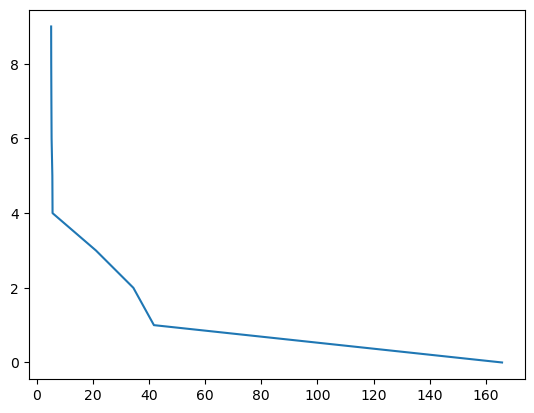

In [71]:
plt.plot(s[:10],range(10))

It seems like $K=40$ is a better choice, but is it?

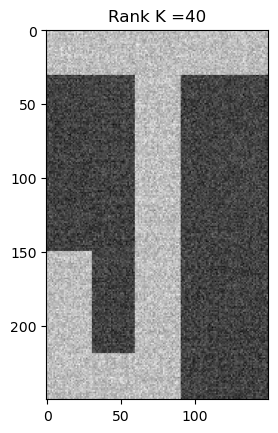

In [78]:
K = 40

Sig = np.mat(np.eye(K)*s[:K])
    
U_reduced = U[:,:K]
V_reduced = V[:K,:]
    
# We get rid of the columns we do not need.
M_rec = U_reduced*Sig*V_reduced
    
    
plt.imshow(M_rec)
plt.title('Rank K =' + str(K))
plt.gray()